# 23. Capstone

## Predicting if a loan will default or not

The dataset used for this analysis can be found using the following link: https://www.kaggle.com/wendykan/lending-club-loan-data


About the data

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. 

The purpose of this project is to build a machine learning model for prediction of loan defaulters based on certain variables present in the dataset. Our main goal is to correctly identifying defaulter's (True positives) so that lending club can decide whether a person is fit for sanctioning a loan or not in the future.

#### check code before submission
http://pep8online.com/


In [1]:
### importing all libraries

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
%matplotlib inline 

from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats import yeojohnson

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.naive_bayes import BernoulliNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # 
from sklearn.linear_model import LogisticRegression #
from sklearn import ensemble #boosting
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM



#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from scipy.stats import boxcox

# These two lines let you show all the columns and rows
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [2]:
### The data is too big to load in gihub. When grading the data can be found
### https://www.kaggle.com/wendykan/lending-club-loan-data#loan.csv
df_temp = pd.read_csv('loan.csv')

## Load the dataset

In [3]:
# lets look at some data to see how they look
df_temp.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [4]:
### take a look at the data and see what format they are
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


From the information above, it seems like there are 2260668 rows, 145 columns. That's a lot of data. So lets start filtering some out.

## Detect the problems with the data
* Detect the problems with the data such as missing values and outliers. 
* Are there any features that does not add any value to our target variable which is the "Loan status" 

In [5]:
## Do we have any missing values?
df_temp.isnull().sum()*100/df_temp.isnull().count()

id                       100.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         98.537777
settlement_date           98.537777
settlement_amount         98.537777
settlement_percentage     98.537777
settlement_term           98.537777
Length: 145, dtype: float64

* Looks like there are a lot of missing values. 
* I am going to use a threshold of 70% to eliminate some of the data. So the columns that have 70% null values, I will drop them. 

In [6]:
df_drop_col_70 = df_temp.dropna(axis=1, thresh=int(0.70*len(df_temp)))

In [7]:
df_drop_col_70.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 87 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                fl

* That brought the columns down to 87 columns. 
* Now lets look at the data a bit carefully and see if there are other columns that are not
needed for our purpose. Again our goal is to predict who will default on their load and 
right now I am trying to find the features that can help predict that.

Text(0, 0.5, 'Data type')

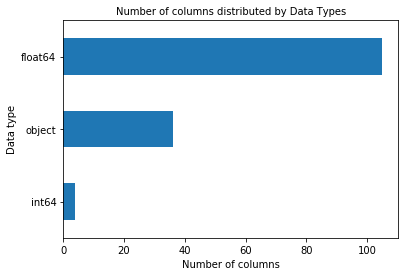

In [8]:
# Lets find out the Number of each type of columns we have so we know what 
# sort of data we are working with
df_temp.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=10)
plt.xlabel('Number of columns')
plt.ylabel('Data type')

Let us see how many categorical data do the columns having 'object' data types contain - Looks like most of the data is numbers but there are strings/object data type. But its a good thing that most of the data is numbers because then we have less features to convert or use dummy variables

* Looking at the numeric and non numberic columns, I am going to identify the features that are most likely to put someone at defaulting the loan. I will start with a lot of features and then cut it down.

* Here are the features at first cut - I will takes these features from the dataframe and look deeper into them

['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','delinq_2yrs','revol_bal', 'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag', loan_status']

* The other features does is not of much interest to me. It does not seem like they will play a role in predicting the defaulter

In [9]:
### taking certain features in the numeric columns and saving it into a new df

df_loan_default_features = df_drop_col_70.filter(['loan_amnt','term','int_rate','installment',
                                             'grade','emp_length','out_prncp',
                                             'home_ownership','annual_inc','verification_status',
                                             'purpose','dti','delinq_2yrs','revol_bal', 
                                             'total_pymnt', 'acc_now_delinq', 'tot_coll_amt', 
                                             'pub_rec_bankruptcies', 'tax_liens', 
                                             'hardship_flag', 'loan_status'])

In [10]:
# Lets kep a copy of this dataframe since this is a bit clean
df_loan_default_features_orig = df_loan_default_features.copy()

In [11]:
 #df_loan_default_features.info()

Lets look to see how much missing values are there in these few features

In [12]:
### Lets see how the missing values look like in these 21 features
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              6.498389
out_prncp               0.000000
home_ownership          0.000000
annual_inc              0.000177
verification_status     0.000000
purpose                 0.000000
dti                     0.075686
delinq_2yrs             0.001283
revol_bal               0.000000
total_pymnt             0.000000
acc_now_delinq          0.001283
tot_coll_amt            3.108639
pub_rec_bankruptcies    0.060380
tax_liens               0.004645
hardship_flag           0.000000
loan_status             0.000000
dtype: float64

There are some missing values. There is enough data so we can drop the rows that have null values

In [13]:
## dropping the null rows 
df_loan_default_features.dropna(axis=0, inplace=True)

In [14]:
# this should have no missing values
df_loan_default_features.isnull().sum()*100/df_loan_default_features.isnull().count()

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
out_prncp               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
revol_bal               0.0
total_pymnt             0.0
acc_now_delinq          0.0
tot_coll_amt            0.0
pub_rec_bankruptcies    0.0
tax_liens               0.0
hardship_flag           0.0
loan_status             0.0
dtype: float64

In [15]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045433 entries, 0 to 2260667
Data columns (total 21 columns):
loan_amnt               int64
term                    object
int_rate                float64
installment             float64
grade                   object
emp_length              object
out_prncp               float64
home_ownership          object
annual_inc              float64
verification_status     object
purpose                 object
dti                     float64
delinq_2yrs             float64
revol_bal               int64
total_pymnt             float64
acc_now_delinq          float64
tot_coll_amt            float64
pub_rec_bankruptcies    float64
tax_liens               float64
hardship_flag           object
loan_status             object
dtypes: float64(11), int64(2), object(8)
memory usage: 343.3+ MB


At this point we have 2045433 rows rather than  2260668 rows that we started with and 20 columns rather than 145 that we started with.

In [16]:
df_loan_default_features.describe()
#df_loan_default_features.shape
# df_loan_default_features.type

,loan_amnt,int_rate,installment,out_prncp,annual_inc,dti,delinq_2yrs,revol_bal,total_pymnt,acc_now_delinq,tot_coll_amt,pub_rec_bankruptcies,tax_liens
count,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06,2.045433e+06
mean,1.535807e+04,1.310150e+01,4.541757e+02,4.606387e+03,8.031272e+04,1.872451e+01,3.166166e-01,1.697869e+04,1.201512e+04,4.350668e-03,2.295993e+02,1.263830e-01,4.793459e-02
std,9.246160e+03,4.852450e+00,2.688211e+02,7.676268e+03,1.166170e+05,1.191074e+01,8.831181e-01,2.332373e+04,9.966543e+03,7.132037e-02,8.779117e+03,3.633543e-01,3.843804e-01
min,1.000000e+03,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.590400e+02,0.000000e+00,4.826800e+04,1.196000e+01,0.000000e+00,6.116000e+03,4.378410e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.350000e+04,1.262000e+01,3.868100e+02,0.000000e+00,6.780400e+04,1.786000e+01,0.000000e+00,1.156100e+04,9.267840e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,6.038100e+02,7.111190e+03,9.500000e+04,2.451000e+01,0.000000e+00,2.061200e+04,1.695975e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,4.000000e+04,1.100000e+08,9.990000e+02,5.800000e+01,2.904836e+06,6.329688e+04,1.400000e+01,9.152545e+06,1.200000e+01,8.500000e+01


Let's look at histograms to see how the numberical variables are looking at what their distributions are. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109b85c90>,
      dtype=object)

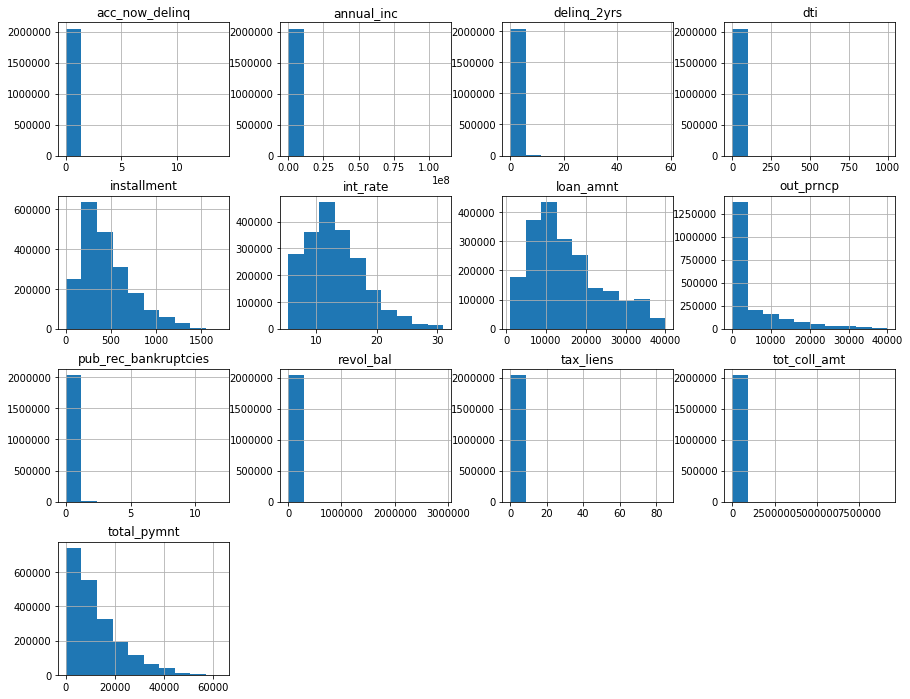

In [17]:
### Lets plot histogram and see the distribution as well as any indication of outliers

#plt.figure(figsize=(15, 12))
df_loan_default_features.hist(figsize=(15, 12))

There are 12 histogram. That means there are 8 columns that are categorical. I want to take a look at the categorical variables and see how they are looking. We can use bar plot, box plot, and violin plots to see what the different categories are.



#for c in numeric_col_df.select_dtypes(['int64', 'float64']).columns:
    #numeric_col_df[c] = np.log1p(numeric_col_df[c])

In [18]:
#Outlier detection for categorical variables

#plt.figure(figsize=(15,25))
#for n, i in enumerate(df_loan_default_features):
   # n=n+1
   # plt.subplot(15,5,n)
   # sns.boxplot(df_loan_default_features[i])

In [19]:
df_loan_default_features['total_pymnt'].value_counts()

0.000000        860
1215.490000     180
1257.300000     162
11258.436374    155
10838.354836    144
               ... 
34081.730033      1
12561.560000      1
2660.530000       1
9987.450000       1
2915.680232       1
Name: total_pymnt, Length: 1462079, dtype: int64

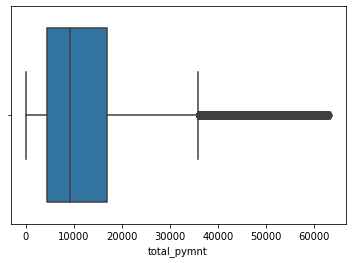

In [20]:
sns.boxplot(df_loan_default_features['total_pymnt'])

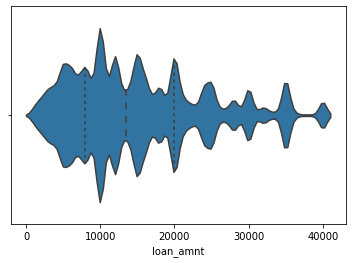

In [21]:
#loan_amnt
#plt.subplots(figsize=(15,6))
sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

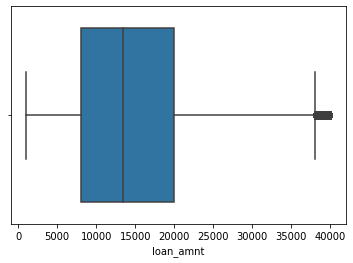

In [22]:
sns.boxplot(df_loan_default_features['loan_amnt'])

In [23]:
#df_loan_default_features['out_prncp'].value_counts()

Most of the loan amount seems to be within 8 - 20K - and there are outliers, therefore, the distribution is not normal. 

It will probably be a good idea to use Boxcox here and remove outliers, bring the distribution to normal, and then analyze the data.

In [24]:
numerical = numeric_columns = df_loan_default_features.select_dtypes(['int64','float64']).columns
for i in numerical:
    if df_loan_default_features[i].min() > 0:
        transformed, lamb = boxcox(df_loan_default_features.loc[df_loan_default_features[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_loan_default_features.loc[df_loan_default_features[i].notnull(), i] = transformed

In [25]:
### I have also tried using log transformation thinking that since the distribution looks tailed, it would work but boxcox gave better results
#for c in df_loan_default_features.select_dtypes(['int64', 'float64']).columns:
    #df_loan_default_features[c] = np.log1p(df_loan_default_features[c])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f5cfb50>,
      dtype=object)

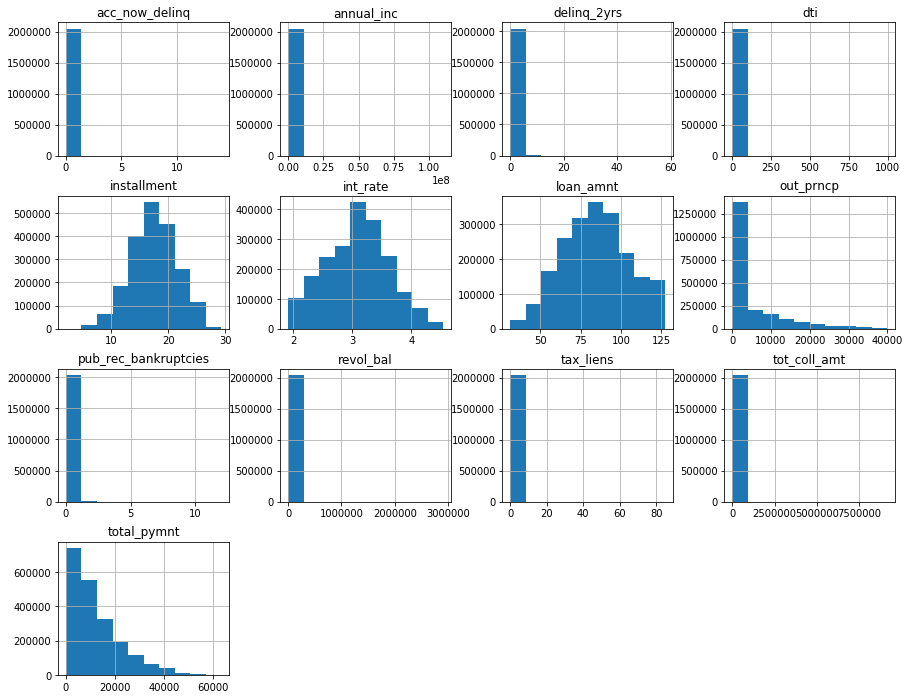

In [26]:
# Lets look at the histograms again after box cox has been applied
df_loan_default_features.hist(figsize=(15, 12))

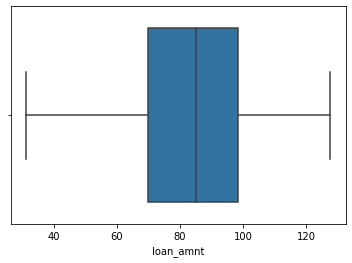

In [27]:
sns.boxplot(df_loan_default_features['loan_amnt'])

It seems like the outliers are taken care of and the loan amount is around 65 -100K

A lot of the distributions look better than before - e.g., loan_amt, installment, int_rate. - we have established that most of the loan amounts are between 65 - 100. Lets look at the int rate and installment and see what they tell us

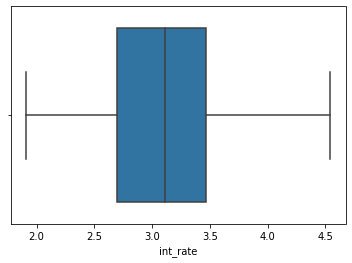

In [28]:
sns.boxplot(df_loan_default_features['int_rate'])

Looks like most interest rates are between 2.7 - 3.5% 

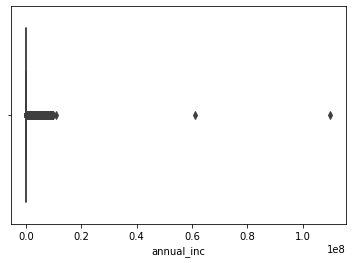

In [29]:
sns.boxplot(df_loan_default_features['annual_inc'])

In [30]:
df_loan_default_features['annual_inc'].describe()

count    2.045433e+06
mean     8.031272e+04
std      1.166170e+05
min      0.000000e+00
25%      4.826800e+04
50%      6.780400e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

Looks like Annual income has outliers which was not taken care of my box cox. The mean is 80312.72 whereas the max is 110000000 - So we should take care of this

In [31]:
annual_inc = df_loan_default_features["annual_inc"].quantile(0.950)
df_loan_default_features = df_loan_default_features[df_loan_default_features["annual_inc"] < annual_inc]

In [32]:
#df_loan_default_features['annual_inc'].describe()

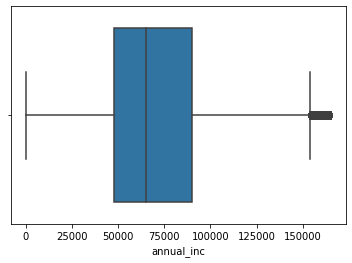

In [33]:
sns.boxplot(df_loan_default_features['annual_inc'])
#sns.violinplot(df_loan_default_features['annual_inc'],inner="quartile")

Looks like most annual incomes are between 50 - 100K

In [34]:
### Now that we have data with no missing values and we have somewhat taken care of outliers, 
## we start looking at our categorical data
### I looked at each categorical features that I chose to see the different categories 
## that there is for each feature

df_drop_col_70.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                         2
grade                        7
sub_grade                   35
emp_title               512694
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
loan_status                  9
pymnt_plan                   2
purpose                     14
title                    63155
zip_code                   956
addr_state                  51
earliest_cr_line           754
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         140
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

* sub_grade                   35
* emp_title               512694
* last_pymnt_d               135
* last_credit_pull_d 
* issue_d                    139
* title                    63155
* zip_code                   956
* addr_state                  51
* earliest_cr_line           754
* last_pymnt_d               135
* last_credit_pull_d         140

These will not be very good since they have too many categories


Now lets take a look at the categorical variables. Our target variable is loan status - so lets start with that-

In [35]:
df_loan_default_features['loan_status'].value_counts()

Fully Paid            886128
Current               799700
Charged Off           223587
Late (31-120 days)     19006
In Grace Period         7854
Late (16-30 days)       3107
Default                   28
Name: loan_status, dtype: int64

* The `loan_status` has different categories. We are interested in `default` loans. 
* However there are only 28 defaults. so the data is not so balanced here - from the data, people who are Current, Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days) are all in risk of defaulting. 
* So we can take all of those and merge it under `default`.

In [36]:
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'In Grace Period']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (16-30 days)']
#df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Late (31-120 days)']

In [37]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.loan_status != 'Current']

In [38]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'In Grace Period':'Default'})

In [39]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (16-30 days)':'Default'})

In [40]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Late (31-120 days)':'Default'})

In [41]:
df_loan_default_features['loan_status'] = df_loan_default_features['loan_status'].replace({'Charged Off':'Default'})

In [42]:
### Loan status should now have only 2 categories
df_loan_default_features['loan_status'].value_counts()

Fully Paid    886128
Default       253582
Name: loan_status, dtype: int64

In [43]:
### 0 being Fully paid and 1 being Default
df_loan_default_features.loan_status=df_loan_default_features.loan_status.astype('category').cat.codes

In [44]:
df_loan_default_features['loan_status'].value_counts()

1    886128
0    253582
Name: loan_status, dtype: int64

In [45]:
### Lets look more closely at the categorical data -

#df_loan_default_features['loan_status'].value_counts()
#df_loan_default_features['acc_now_delinq'].value_counts()
#df_loan_default_features['delinq_2yrs'].value_counts()
#df_loan_default_features['dti'].value_counts()
#df_loan_default_features['pub_rec_bankruptcies'].value_counts()
#df_loan_default_features['revol_bal'].value_counts()
#df_loan_default_features['tax_liens'].value_counts()
#df_loan_default_features['tot_coll_amt'].value_counts()

In [46]:
#df_loan_default_features.info()

<Figure size 2160x1440 with 0 Axes>

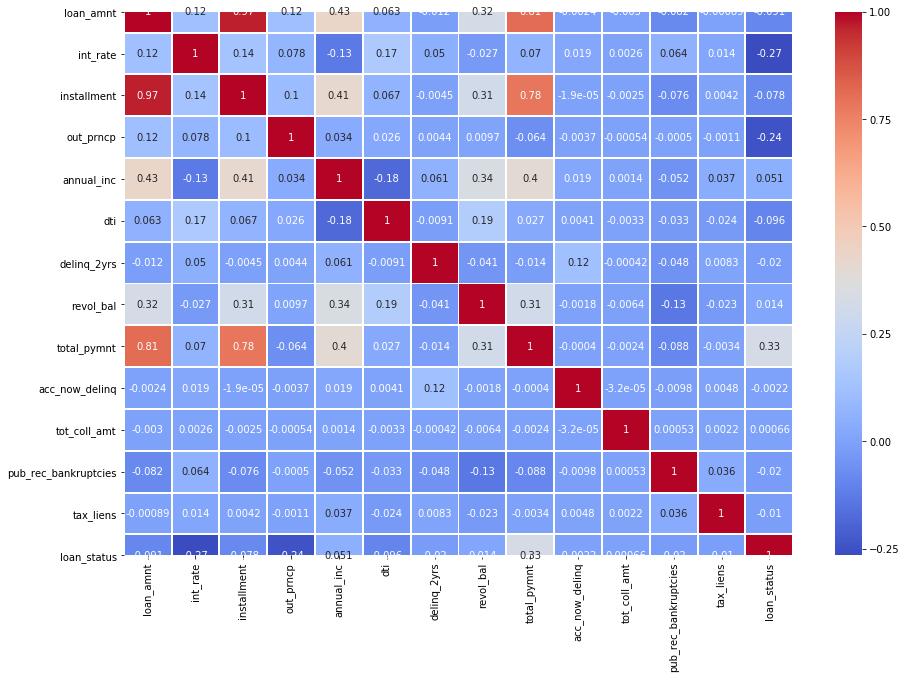

In [47]:
### lets look at the data correlation for only the continuous variables with loan status for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

I am going to use a cut off of 60% to eliminate features that are highly correlated to each other. and the same amount of 60% to see which features are correlated to the loan status later on

* It seems like total payment and loan amt are highly corrlated to each other - (we might want to elimindate total_payment)

* It seems like total payment and installments are highly correlated to each other - (we might want to eliminate total payment) 
* Intallment and loan amount are highly correlated as well - - this makes sense since a person who takes a large sum of loan would require extra time to repay it back. --- drop installment

In [48]:
## Dropping total_payment
df_loan_default_features.drop('total_pymnt', axis=1, inplace=True)

In [49]:
## Dropping installment
df_loan_default_features.drop('installment', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

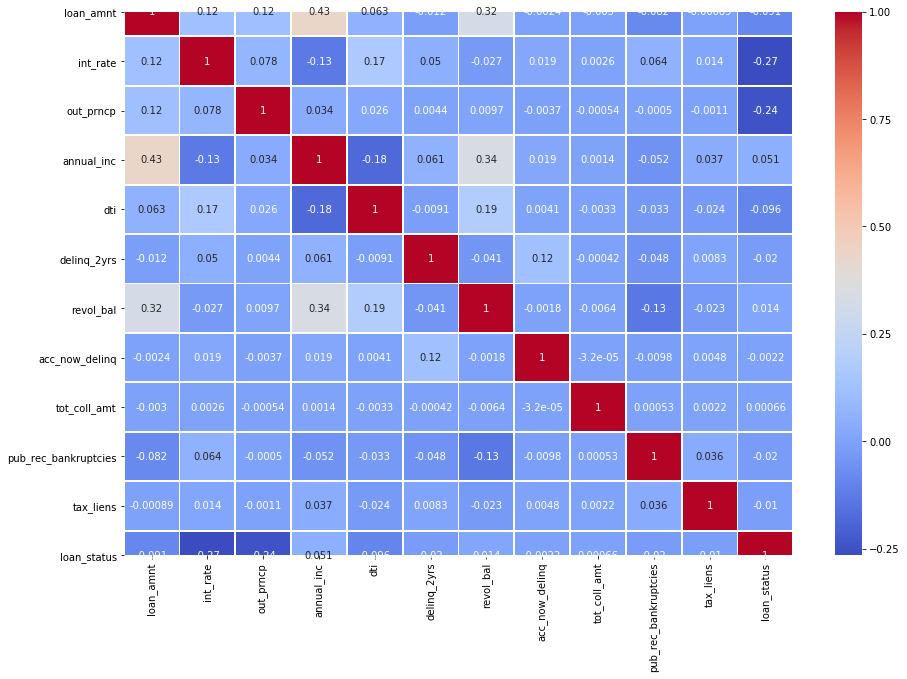

In [50]:
### lets look at the data correlation for only the continuous variables for now

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

Its time to look at the other categorical variables

In [51]:
df_loan_default_features['term'].value_counts()

 36 months    852896
 60 months    286814
Name: term, dtype: int64

In [52]:
### We can also plot it too if we want -

#df_loan_default_features.term.value_counts().plot(kind='bar', figsize=(20, 10))
#plt.title('Term counts')
#plt.xlabel('Term title')
#plt.ylabel('Term counts')

In [53]:
### its only 2 categories so lets change them to numeric
df_loan_default_features.term=df_loan_default_features.term.astype('category').cat.codes

In [54]:
#df_loan_default_features.info()

In [55]:
df_loan_default_features['term'].value_counts()

0    852896
1    286814
Name: term, dtype: int64

In [56]:
df_loan_default_features['grade'].value_counts()

C    332414
B    328856
A    184929
D    175139
E     82048
F     28228
G      8096
Name: grade, dtype: int64

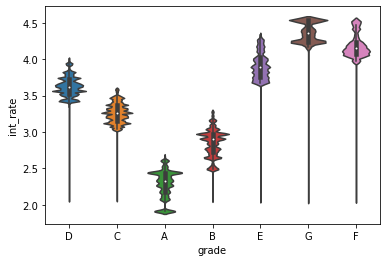

In [57]:
#sns.violinplot(df_loan_default_features['loan_amnt'],inner="quartile")

sns.violinplot(x="grade", y="int_rate", data=df_loan_default_features)

Looks like there maybe a correlation between interest rate and grade - the highter the grade is the higher the interest rate is.

In [58]:
#sns.violinplot(x="grade", y="loan_amnt", data=df_loan_default_features)

In [59]:
### Lets convert Grade - numberic
df_loan_default_features.grade=df_loan_default_features.grade.astype('category').cat.codes

In [60]:
df_loan_default_features['grade'].value_counts()

2    332414
1    328856
0    184929
3    175139
4     82048
5     28228
6      8096
Name: grade, dtype: int64

In [61]:
df_loan_default_features['emp_length'].value_counts()

10+ years    402237
2 years      108833
< 1 year      96585
3 years       96336
1 year        79589
5 years       74447
4 years       71055
6 years       55623
8 years       55215
7 years       53544
9 years       46246
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

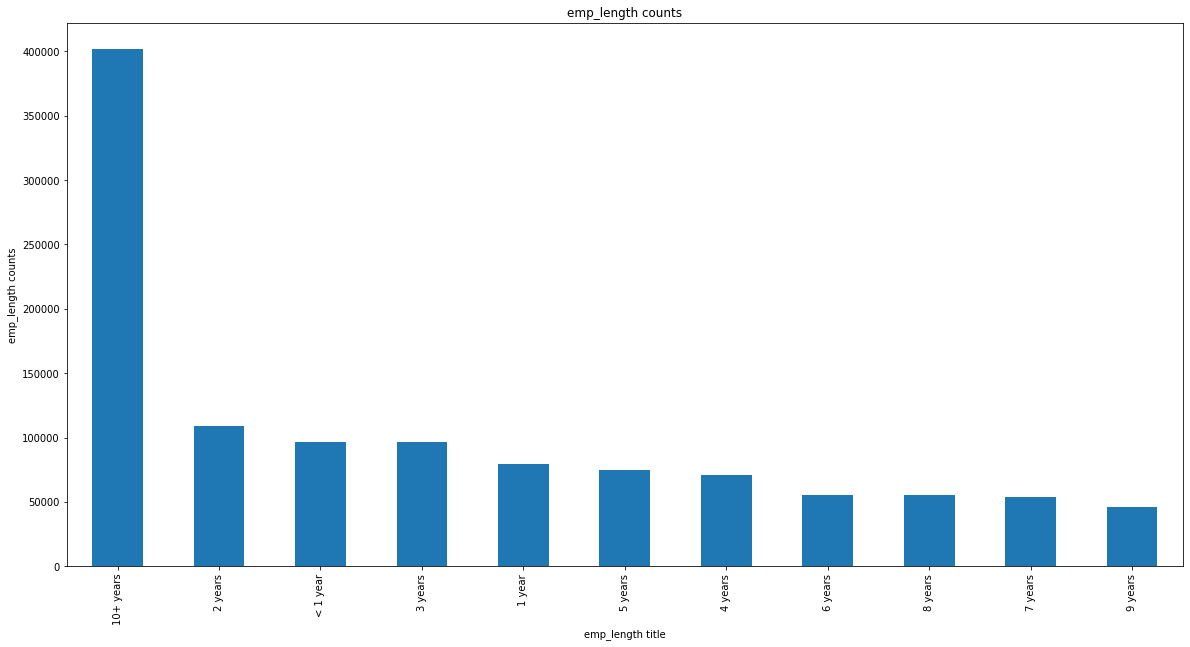

In [62]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

Looks like most people who takes loan have job for 10+ years. It might be better to combine them to a little less categories

- 0-4
- 5-9
- 10+


In [63]:
df_loan_default_features['emp_length'] = df_loan_default_features['emp_length'].replace({'< 1 year':'0-4 years',
                         '1 year':'0-4 years',
                         '2 years':'0-4 years',
                         '3 years':'0-4 years',
                         '4 years':'0-4 years',
                         '5 years':'5-9 years',
                         '6 years':'5-9 years',
                         '7 years':'5-9 years',
                         '8 years':'5-9 years',
                         '9 years':'5-9 years'})

In [64]:
df_loan_default_features['emp_length'].value_counts()

0-4 years    452398
10+ years    402237
5-9 years    285075
Name: emp_length, dtype: int64

Text(0, 0.5, 'emp_length counts')

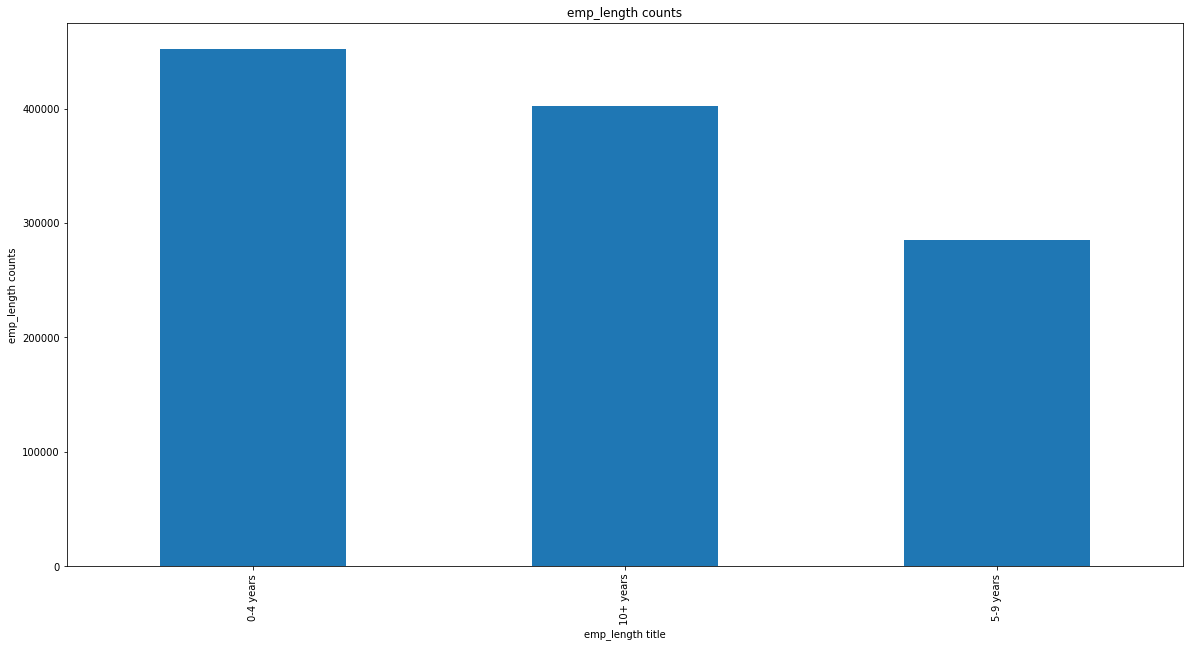

In [65]:
df_loan_default_features.emp_length.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('emp_length counts')
plt.xlabel('emp_length title')
plt.ylabel('emp_length counts')

In [66]:
### Lets convert emp_length to - numberic
df_loan_default_features.emp_length=df_loan_default_features.emp_length.astype('category').cat.codes

In [67]:
df_loan_default_features['emp_length'].value_counts()

0    452398
1    402237
2    285075
Name: emp_length, dtype: int64

In [68]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    558647
RENT        462758
OWN         117969
ANY            252
NONE            43
OTHER           41
Name: home_ownership, dtype: int64

From the amount of data we have - we could drop any/none/other and just keep it to the 3 categories.

In [69]:
df_feat_temp2 = df_loan_default_features.copy()

In [70]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139710 entries, 100 to 2260664
Data columns (total 19 columns):
loan_amnt               1139710 non-null float64
term                    1139710 non-null int8
int_rate                1139710 non-null float64
grade                   1139710 non-null int8
emp_length              1139710 non-null int8
out_prncp               1139710 non-null float64
home_ownership          1139710 non-null object
annual_inc              1139710 non-null float64
verification_status     1139710 non-null object
purpose                 1139710 non-null object
dti                     1139710 non-null float64
delinq_2yrs             1139710 non-null float64
revol_bal               1139710 non-null int64
acc_now_delinq          1139710 non-null float64
tot_coll_amt            1139710 non-null float64
pub_rec_bankruptcies    1139710 non-null float64
tax_liens               1139710 non-null float64
hardship_flag           1139710 non-null object
loan_status       

In [71]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'ANY']

In [72]:
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'NONE']
df_loan_default_features = df_loan_default_features[df_loan_default_features.home_ownership != 'OTHER']

In [73]:
df_loan_default_features['home_ownership'].value_counts()

MORTGAGE    558647
RENT        462758
OWN         117969
Name: home_ownership, dtype: int64

In [74]:
df_loan_default_features.home_ownership=df_loan_default_features.home_ownership.astype('category').cat.codes

In [75]:
df_loan_default_features['home_ownership'].value_counts()

0    558647
2    462758
1    117969
Name: home_ownership, dtype: int64

In [76]:
df_loan_default_features['verification_status'].value_counts()

Source Verified    457528
Not Verified       351627
Verified           330219
Name: verification_status, dtype: int64

In [77]:
df_loan_default_features['verification_status'] = df_loan_default_features['verification_status'].replace({'Verified':'Source Verified'})

In [78]:
df_loan_default_features.verification_status=df_loan_default_features.verification_status.astype('category').cat.codes
df_loan_default_features['verification_status'].value_counts()

1    787747
0    351627
Name: verification_status, dtype: int64

This probably means if the borrowers status and income was verified. This feature has some discrepency - It seems like source verified and verified could be the same - its probably dirty data and its giving it 2 different categories for the same things. I am going to drop this column since it does not seem to be a feature that could be useful for determining a loan defaulter.

In [79]:
#df_loan_default_features.drop('verification_status', axis=1, inplace=True)

In [80]:
#df_loan_default_features.info()

In [81]:
df_loan_default_features['purpose'].value_counts()

debt_consolidation    673568
credit_card           252043
home_improvement       69325
other                  63608
major_purchase         23329
medical                12659
car                    11170
small_business         11127
moving                  7750
vacation                7491
house                   5750
wedding                  838
renewable_energy         715
educational                1
Name: purpose, dtype: int64

THe purpose column also does not provide too much info on whether someone will pay loan off or not. and its all over the place - so we should delte that columns too

In [82]:
df_loan_default_features.drop('purpose', axis=1, inplace=True)

In [83]:
#df_loan_default_features.info()

In [84]:
df_loan_default_features['hardship_flag'].value_counts()

N    1138615
Y        759
Name: hardship_flag, dtype: int64

This is a very unbalanced data - Although hardship flag may say something about whether a person will default or not, this data is very scewed - so we will drop this too

In [85]:
df_loan_default_features.drop('hardship_flag', axis=1, inplace=True)

In [86]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139374 entries, 100 to 2260664
Data columns (total 17 columns):
loan_amnt               1139374 non-null float64
term                    1139374 non-null int8
int_rate                1139374 non-null float64
grade                   1139374 non-null int8
emp_length              1139374 non-null int8
out_prncp               1139374 non-null float64
home_ownership          1139374 non-null int8
annual_inc              1139374 non-null float64
verification_status     1139374 non-null int8
dti                     1139374 non-null float64
delinq_2yrs             1139374 non-null float64
revol_bal               1139374 non-null int64
acc_now_delinq          1139374 non-null float64
tot_coll_amt            1139374 non-null float64
pub_rec_bankruptcies    1139374 non-null float64
tax_liens               1139374 non-null float64
loan_status             1139374 non-null int8
dtypes: float64(10), int64(1), int8(6)
memory usage: 110.8 MB


We now have 16 columns - 1183710 entries and data is all numberic. 

In [87]:
#sns.barplot(data=df_loan_default_features)

<Figure size 2160x1440 with 0 Axes>

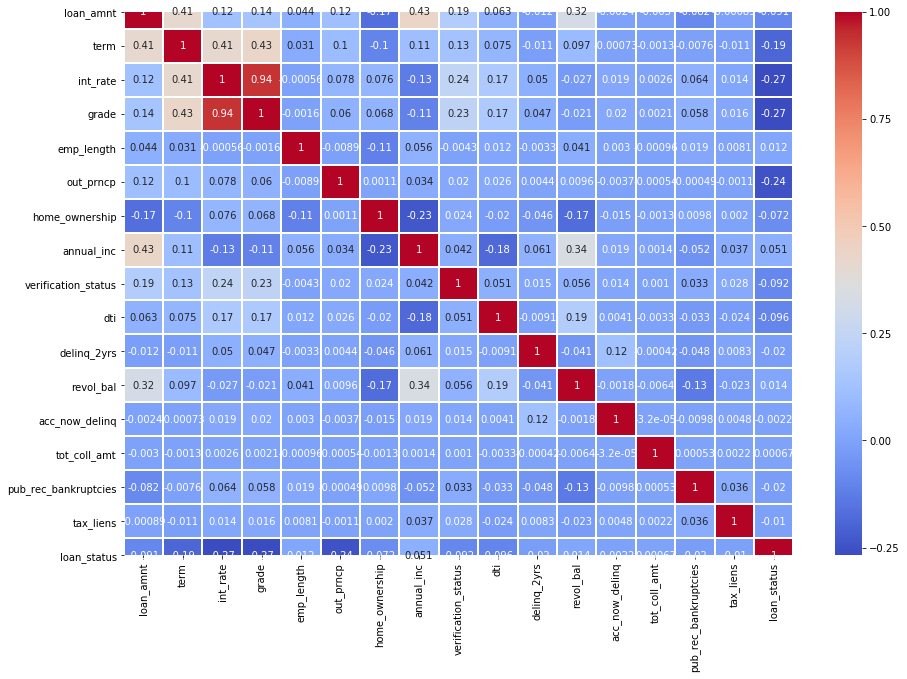

In [88]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

As we have suspected, grade has a high correlation with interest rate - so we will keep interest rate and remove grade.

In [89]:
df_loan_default_features.drop('grade', axis=1, inplace=True)

In [90]:
temp = df_loan_default_features.copy()

In [91]:
df_loan_default_features.drop('loan_amnt', axis=1, inplace=True)

<Figure size 2160x1440 with 0 Axes>

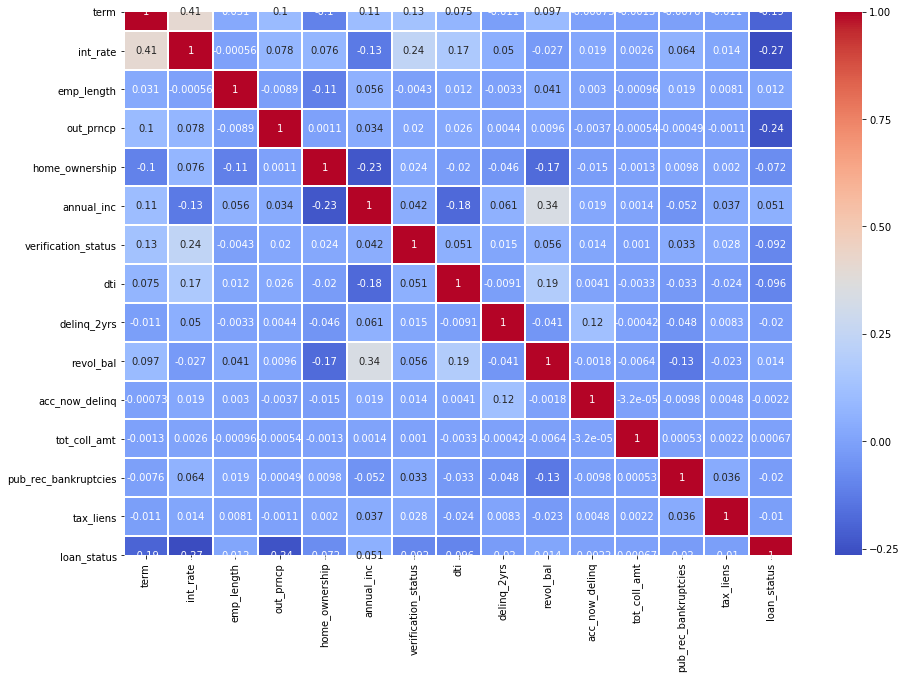

In [92]:
### lets look at the correlation again

plt.figure(figsize=(30,20))
plt.subplots(figsize=(15, 10))
#sns.heatmap(df2.select_dtypes(include = ['number']).corr(), annot=True, linewidths=.5, cmap = 'coolwarm')
sns.heatmap(df_loan_default_features.select_dtypes(include = ['number']).corr(), 
            linewidths=1, annot=True, cmap = 'coolwarm')
plt.show()

In [93]:
df_loan_default_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139374 entries, 100 to 2260664
Data columns (total 15 columns):
term                    1139374 non-null int8
int_rate                1139374 non-null float64
emp_length              1139374 non-null int8
out_prncp               1139374 non-null float64
home_ownership          1139374 non-null int8
annual_inc              1139374 non-null float64
verification_status     1139374 non-null int8
dti                     1139374 non-null float64
delinq_2yrs             1139374 non-null float64
revol_bal               1139374 non-null int64
acc_now_delinq          1139374 non-null float64
tot_coll_amt            1139374 non-null float64
pub_rec_bankruptcies    1139374 non-null float64
tax_liens               1139374 non-null float64
loan_status             1139374 non-null int8
dtypes: float64(9), int64(1), int8(5)
memory usage: 101.1 MB


So now we have 14 features that we will use to model

In [94]:
### Lets make a copy of our dataframe in case something goes wrong
df_features_final = df_loan_default_features.copy()

* Getting data without the model

- Before we look at the models, I wanted to get an idea of how my data is doing so far.
* What would be the accuracy of the model is someone was paying the loan

    - Fully Paid 922635	
    - Default 261423

922635 /(922635+261423) = .7792 -> 77.92%

* Our model should give us at least that 


## Supervised Machine learning algorithms for prediction

In [95]:
### Lets create our x and y variables
X = df_loan_default_features.copy()
y = df_loan_default_features['loan_status']
X = df_loan_default_features.drop(['loan_status'], axis=1)

In [96]:
### spliting test and train dataset
### Taking 25% of the data for test - 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Naive Bayes

In [97]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [99]:
naive_bayes_sm = BernoulliNB()
naive_bayes_sm.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [100]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, naive_bayes.predict(X_test))))

accuracy score: 0.8041



In [101]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, naive_bayes.predict(X_test))))

Confusion Matrix: 
 [[  7477  55778]
 [    16 221573]]



In [102]:
print("Classification Report: \n {}\n".format(classification_report(y_test, naive_bayes.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.12      0.21     63255
           1       0.80      1.00      0.89    221589

    accuracy                           0.80    284844
   macro avg       0.90      0.56      0.55    284844
weighted avg       0.84      0.80      0.74    284844




### Logistic regression

In [103]:
### Create and fit the model
logistic_regression = LogisticRegression(C = 0.0001,random_state=21)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, logistic_regression.predict(X_test))))

accuracy score: 0.8041



In [105]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, logistic_regression.predict(X_test))))

Confusion Matrix: 
 [[  7453  55802]
 [     0 221589]]



In [106]:
result = cross_val_score(logistic_regression, X_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(result)))

Average Accuracy: 	 0.8035


In [107]:
print("Classification Report: \n {}\n".format(classification_report(y_test, logistic_regression.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.12      0.21     63255
           1       0.80      1.00      0.89    221589

    accuracy                           0.80    284844
   macro avg       0.90      0.56      0.55    284844
weighted avg       0.84      0.80      0.74    284844




###  Random forest
* In logistic regression, we saw that the model might have been overfitted - Random forrest tends not to overfit - so lets try that

In [108]:
### Create and fit the model
random_forrest = RandomForestClassifier(n_estimators=40, random_state=21)
random_forrest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [109]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest.predict(X_test))))

accuracy score: 0.7966



In [110]:
### confusion matrix
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest.predict(X_test))))

Confusion Matrix: 
 [[ 14257  48998]
 [  8935 212654]]



In [111]:
### Classification report
print("Classification Report: \n {}\n".format(classification_report(y_test, random_forrest.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.23      0.33     63255
           1       0.81      0.96      0.88    221589

    accuracy                           0.80    284844
   macro avg       0.71      0.59      0.60    284844
weighted avg       0.77      0.80      0.76    284844




When it comes to Random forest, at this point we want to see if we can do hyperparameter tuning to see if we can get our model to do better by picking the right features. We can do that by Grid search or random search. Grid search takes long so we will use Random search

In [112]:
# random search tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [113]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [115]:
## Now, we instantiate the random search and fit it like any Scikit-Learn model:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
### Create and fit the model
random_forrest_rand = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_forrest_random = RandomizedSearchCV(estimator = random_forrest_rand, 
                                              param_distributions = random_grid, 
                                              n_iter = 2, cv = 3, verbose=2, 
                                              random_state=42, n_jobs = -1)
# Fit the random search model
random_forrest_random.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 10.2min remaining: 10.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 34.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Tried several ways to do this random search - was taking way too ling - so finally worked with n_iter = 2, cv = 3 -

In [117]:
#We can view the best parameters from fitting the random search:
random_forrest_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [118]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest_random.predict(X_test))))

accuracy score: 0.8048



In [119]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest_random.predict(X_test))))

Confusion Matrix: 
 [[ 11783  51472]
 [  4126 217463]]



In [120]:
print("Classification Report: \n {}\n".format(classification_report(y_test, random_forrest_random.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.19      0.30     63255
           1       0.81      0.98      0.89    221589

    accuracy                           0.80    284844
   macro avg       0.77      0.58      0.59    284844
weighted avg       0.79      0.80      0.76    284844




Even with hyperparameter tuning using random search, random forest did not improve that much. Infact, it took a lot of try and a lot of time - so the first random forest model gave 79.66% and this one gave 80.48%. Its an improvement but not by that much

## Boosting model

In [121]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
boosting_model = ensemble.GradientBoostingClassifier(**params)
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
### Accuracy of the model
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, boosting_model.predict(X_test))))

accuracy score: 0.8064



In [123]:
###
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, boosting_model.predict(X_test))))

Confusion Matrix: 
 [[ 11095  52160]
 [  2997 218592]]



In [124]:
print("Classification Report: \n {}\n".format(classification_report(y_test, boosting_model.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.18      0.29     63255
           1       0.81      0.99      0.89    221589

    accuracy                           0.81    284844
   macro avg       0.80      0.58      0.59    284844
weighted avg       0.80      0.81      0.75    284844




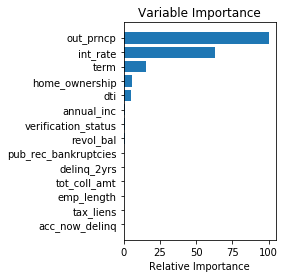

In [125]:
feature_importance = boosting_model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

* So far looking at the models, it seems like the Gradient boosting model is doing the best so far.
* The features that Gradient boosting model identified as the best parameters are shown as above.


### SMOTE - mention that you tried - did not make it better

* Another way to see if the models would improve would be to use SMOTE. Since I have seen data imbalance already, I knew that it was a reason for poor performance - so I use SMOTE

* — Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

"SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b."



In [128]:
# SMOTE
#### SMOTE on training data only
from imblearn.over_sampling import SMOTE
smote_data = SMOTE(random_state=12)
X_train_sm, y_train_sm = smote_data.fit_sample(X_train, y_train)
#X_test_sm, y_test_sm = smote_data.fit_sample(X_train, y_test)

In [129]:
### Naive Bayes
naive_bayes_sm = BernoulliNB()
naive_bayes_sm.fit(X_train_sm, y_train_sm)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [130]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, naive_bayes_sm.predict(X_test))))

accuracy score: 0.6626



In [131]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, naive_bayes_sm.predict(X_test))))

Confusion Matrix: 
 [[ 26069  37186]
 [ 58929 162660]]



In [132]:
print("Classification Report: \n {}\n".format(classification_report(y_test, naive_bayes_sm.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.31      0.41      0.35     63255
           1       0.81      0.73      0.77    221589

    accuracy                           0.66    284844
   macro avg       0.56      0.57      0.56    284844
weighted avg       0.70      0.66      0.68    284844




Unfortunately SMOTE made the models worst.

In [133]:
### Logistic regression

log_reg_sm = LogisticRegression(C = 0.0001,random_state=21)
log_reg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, log_reg_sm.predict(X_test))))

accuracy score: 0.6254



In [135]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, log_reg_sm.predict(X_test))))

Confusion Matrix: 
 [[ 32707  30548]
 [ 76151 145438]]



In [136]:
print("Classification Report: \n {}\n".format(classification_report(y_test, log_reg_sm.predict(X_test))))

Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.52      0.38     63255
           1       0.83      0.66      0.73    221589

    accuracy                           0.63    284844
   macro avg       0.56      0.59      0.56    284844
weighted avg       0.71      0.63      0.65    284844




In [137]:
#### Random forrest

### Create and fit the model
random_forrest_sm = RandomForestClassifier(n_estimators=40, random_state=21)
random_forrest_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [139]:
### Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, random_forrest_sm.predict(X_test))))

accuracy score: 0.7432



In [140]:

### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, random_forrest_sm.predict(X_test))))

Confusion Matrix: 
 [[ 22966  40289]
 [ 32854 188735]]



In [142]:
##### gradiant boosing
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
boosting_model_sm = ensemble.GradientBoostingClassifier(**params)
boosting_model_sm.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [143]:
### accuracy on test -
# Accuracy with test data
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, boosting_model_sm.predict(X_test))))

accuracy score: 0.7560



In [144]:
### test data
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, boosting_model_sm.predict(X_test))))

Confusion Matrix: 
 [[ 21262  41993]
 [ 27517 194072]]



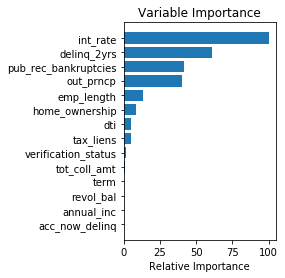

In [145]:
feature_importance = boosting_model_sm.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Summary

This project is about predicting if someone will default loan or not given certain features that are associated with the loans. 

The target variable in this project is the loan status (paid or default). I will look at all the features and classify if the will be paid or default. That makes this project a candidate to use supervised model where the target variable is categorical (paid or default).

I started with 145 features. I cleaned the data for missing values. I used dropping columns as well as rows to handle missing values. 

I also used data explaorations and use that to help clean the dataset. For example, a lot of the data had various categories which are either unnecessaily categorized so I use techniques to merge them to reduce the number of categories so it would be easier to create numeric categories from them.

I have also used histogram box plot, bar plot, and violine plot to look at the data and look at relationship between features.

I have tried serveral ways to get rid of outliers and bring distribution to normal. Looking at relationships between features, I have selected forst 87, then 16 and then 14 features. A lot of features were selcted and removed based on looking at correlations with other features and correlation with the target variable.

After much data cleaning and expolation, I came down to 14 features that could be closely related to predicting if someone will default the loan or not. 

Once the dataset was ready, I used 4 classification models - Naive Bayes, Logiestic regression, Random Forest classifier, and gradiant boosting classifer models and applied this dataset on all 4 of them. The results are as follows:

- Naive Bayes: 80.41%
- Logistic Regression: 80.41%  Logistic regression: K mean Cross Val: 80.35%
- Random Forest: 79.66%
- Gradiant Boosting: 80.64%

Out of all 4 models, Gradiant boosting seemed like it did th ebest. Gradiant boosting provided the best parameters for the model as well. 

Other than using K mean cross validation to pick the right features, I also used random search for Random forest to see if it will improve the model. Random search can be very time and processing power consuming. After much try, It gave me 80.48%which is not much of an improvment than the original 79.66%

My last attempt of trying to see if the models can be improved is to use SMOTE in case data imbalance was an issue. I have seen from my plots that data imbalance was an issue in some features but I tried to take care of it. However, I wanted to make sure that it was not an issue for the features that I did not take care of.

SMOTE gave me the following performance of my models.

- Naive Bayes: 66.26%
- Logistic Regression: 62.54%
- Random Forest: 74.32%
- Gradiant boosting: 75.60%

They are all poor performing than without using SMOTE. Therefore, it seems like SMOTE would not improve the models at all. 

Therefore, the final conclusion is that gradiant boosting model without SMOTE is still the best model to use for this data giving us almost 81% accuracy. The accuracy is not as great as I would have hoped. I believe that the data itself probably is not as good as it should be for a model to give me 90% or more accuracy. 


The slides for my presentation of this capstone can be found here: https://docs.google.com/presentation/d/12o4x_3f_1oKBUhZdDyxAAFGIv3bCiwR3xBJ7Zg6DJ9g/edit?usp=sharing